## Networks in real life
Several problems encountered in Operations Research (OR) involve networks, such as: Distribution problems (for example, transportation networks) Assignment problems (for example, networks of workers and jobs they could be assigned to) Planning problems (for example, critical path analysis for project planning)

Several problems encountered in Operations Research (OR) involve networks, such as: Distribution problems (for example, transportation networks) Assignment problems (for example, networks of workers and jobs they could be assigned to) Planning problems (for example, critical path analysis for project planning)

#### Network modeling concepts
Any network structure can be described using two types of objects:

- Nodes: Defined points in the network, for example warehouses.
- Arcs: An arc connects two nodes, for example a road connecting two warehouses

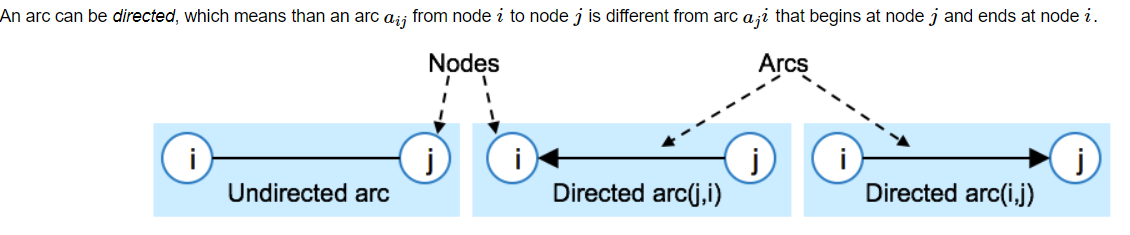

##### Different types of network problems
The following are some well-known types of network problems:

- Transportation problem
- Transshipment problem
- Assignment problem
- Shortest path problem
- Critical path analysis

## The Transportation Problem

One of the most common real-world network problems is the transportation problem. This type of problem involves a set of supply nodes and a set of demand nodes. The objective is to minimize the transportation cost from the supply nodes to the demand nodes, so as to satisfy the demand, and without exceeding the suppliers’ capacities.

Such a problem can be depicted in a graph, with supply nodes, demand nodes, and connecting arcs. The supply capacity is indicated with the supply nodes, while the demand is indicated with the demand nodes, and the transportation costs are indicated on the arcs.

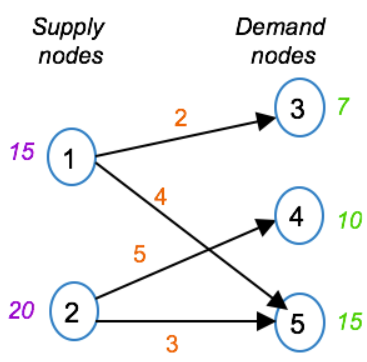

The LP formulation involves one type of variable, namely x(i,j) representing the quantity transported from supply node i to demand node j. The objective is to minimize the total transportation cost across all arcs. The constraints are flow conservation constraints. The first two constraints state that the outflow from each supply node should be less than or equal to the supply capacity. The next three constraints state that the inflow into each demand node should equal the demand at that node. The domain for the shipments on the allowable arcs is set to be greater than or equal to zero, while the shipment quantities on the disallowed arcs are set to zero.

Even though arcs (1,4) and (2,3) do not exist in the graph, the variables are included in the slide to show the special structure of the transportation problem. If you were to formulate such a model in practice, you’d simply exclude these variables.

###### Formulating a simple transportation problem with DOcplex
In the next section, we formulate the problem described above using DOcplex

What data for the transportation problem?
Input nodes are integers ranging in {1, 2}; output nodes are integers ranging from 3 to 5.

The data consists in three Python dictionaries:

- one dictionary gives capacity values for all input nodes
- one dictionary contains demands for all target nodes
- one last dictionary holds cost values for some (source, target) pair of nodes.

In [1]:
capacities = {1: 15, 2: 20}
demands = {3: 7, 4: 10, 5: 15}
costs = {(1,3): 2, (1,5): 4, (2,4): 5, (2,5): 3}

# Python ranges will be used to iterate on source, target nodes.
source = range(1, 3) # {1, 2}
target = range(3, 6) # {3,4,5}

##### Create a model instance

In [2]:
from docplex.mp.model import Model

tm = Model(name='transportation')

##### Define the decision variables

- The continuous variable x_i_j represents the quantity transported from supply node i to demand node j.

In [3]:
# create flow variables for each couple of nodes
# x(i,j) is the flow going out of node i to node j

x = {(i, j): tm.continuous_var(name='x_{0}_{1}'.format(i, j)) for i in source for j in target if (i, j) in costs}

tm.print_information()

Model: transportation
 - number of variables: 4
   - binary=0, integer=0, continuous=4
 - number of constraints: 0
   - linear=0
 - parameters: defaults
 - objective: none
 - problem type is: LP


##### Set up the constraints

- For each source node, the total outbound flow must be smaller than available quantity.
- For each target node, total inbound flow must be greater thand demand

In [4]:
# For each source node, all outflows must be less than quantity supply

for i in capacities:
    
    tm.add_constraint(tm.sum(x[i, j] for j in target if (i, j) in costs) <= capacities[i])
    
# For each target node, all inflows must be greater than demand

for j in demands:
    
    tm.add_constraint(tm.sum(x[i, j] for i in source if (i, j) in costs) >= demands[j])

##### Express the business objective: minimize total flow cost
Each arc has a unit cost and we want to minimize the total cost. We only express cost when the arc exists.

In [5]:
tm.minimize(tm.sum(x[i, j]*costs[i,j] for i in source for j in target if (i, j) in costs))

In [6]:
tms = tm.solve()
assert tms
tms.display()

solution for: transportation
objective: 114.000
x_1_3 = 7.000
x_1_5 = 5.000
x_2_4 = 10.000
x_2_5 = 10.000


In [7]:
tm.print_solution()

objective: 114.000
  x_1_3=7.000
  x_1_5=5.000
  x_2_4=10.000
  x_2_5=10.000


#### Special structure of network problem

The structure of network problem allow for the use of specialized algorithms that significantly reduce solution time. When capacities and demands are integers then the solution of decision variavles will also be integers. What this means is that integer variables do not have to be used in this cases.

- Problems with integer variables often require more computational efforts than continuous variables.

## Transshipment problem

TRansshipment problem is also similar to transportation problem. THe major difference is the existensce of an internmediate nodes between source nodes and target nodes.

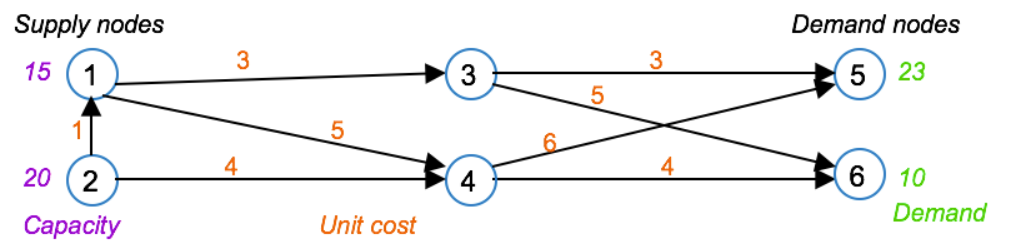

LP solution is similar and formulated like transportation problem. Minimization of the transportation costs along the arcs while respecting the flow constraints. The first two constraints are for the supply nodes, and state that the outflow from each supply node should equal the capacity of that node, plus any inflow into that same node. The next two constraints are for the intermediate nodes, and state that the inflow into an intermediate node should equal the outflow out of that node. The last two constraints are for the demand nodes, and state that the inflow into each demand node should equal the demand at that node. The domain for the variables is to be greater than or equal to zero.

It is possible to write the transshipment problem as a transportation problem in order to use specialized algorithms that exploit the structure of transportation problem. This conversion is not covered as part of this course because CPLEX Optimizer does this conversion automatically.

## The Assignment Problem

This is the problem of assigning a set of items to another. Example is assigning a jobs to workers in order to minimize hiring costs.

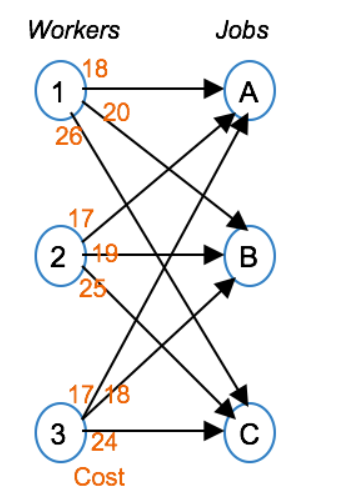

In this example, the workers are represented by nodes 1 through 3, while the jobs are represented with nodes A, B and C. The cost of assigning a worker to a job is shown on each arc. The objective is to minimize the total assignment cost. Again, the constraints can be seen as flow conservation constraints. The first three constraints state that each job is filled by exactly one person, while the last three constraints state that each person is assigned to exactly one job. The variables should now take a value of 1 if worker i is assigned to job j, and zero otherwise.

This problem is a special case of the transportation problem, with each supply node capacity set to one, and each demand set to 1. What’s also important to know is that even though the variables must take 0-1 values, they can be declared as continuous variables due to the integrality property, namely that if all capacity and demand quantities are integer, the variables will take integer values.

## Shortest path problem

This problem helps to determine the shortest path between two cities in a network of cities.  For example, to find the minimum travel time between two cities in a network of cities. The shortest path problem is a special case of the transshipment problem, where there is exactly one supply node and one demand node, and the supply and demand are both equal to 1.

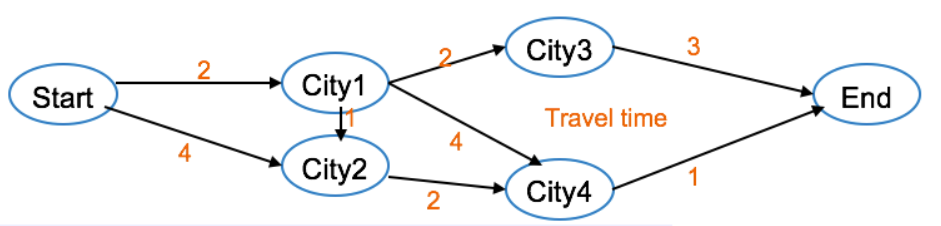

In this example, each node represents a city, and each arc represents the road connecting two cities. The travel time is indicated on each arc. The variable x(i, j) takes a value of 1 if the arc between i and j is included in the shortest path, and zero otherwise. The objective is to minimize the total travel time. As with the other network problems, the constraints can be seen as flow conservation constraints. A constraint exists for each node (or each city) and the constraints state that exactly one arc should be chosen into each city, and exactly one arc should be chosen out of each city.

Again, even though the x variables must take 0-1 values, they can be declared as continuous due to the integrality property (that is, all the capacity and demand quantities are integer).

## Critical Path Analysis

This is a kind of problem used in project planning for determining how a delay in one critical activity could lead to an overall project delay. The critical path represent the longest path in the network. If any activity is delayed in the critical path, the overall project is delayed.

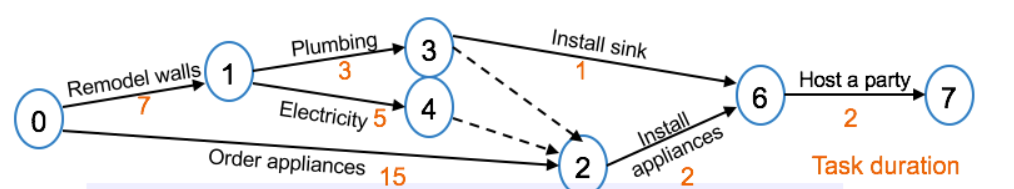

Here, the arcs show the task durations, while the nodes show the task start times. For modeling purposes, let t(i) be the start time of the tasks originating at node i. The objective is to minimize the project completion time, namely t7. The constraints indicate the task duration and precedence. For example, the third constraint indicates that the minimum time between starting the sink installation (that is, node 3), and starting the plumbing (that is, node 1) is 3 days. Arcs 3-2 and 4-2 are dummy tasks required to complete the model. Such dummy tasks have no minimum time associated with them, but are used to model precedence involving more than one preceding tasks of varying duration, in this case that the plumbing, electricity, and appliance order time must be complete before appliances can be installed.

In this graph, it’s easy to see that the critical path lies on nodes 0 – 2 – 6 – 7, with a total length of 19 days. Therefore, any delay in the appliance ordering or installation will delay the party date.

Large projects can lead to very complex networks, and specialized algorithms exist for critical path analysis.

### Non-linearity and convexity

Non-linearity occurs when decision variables are not governed by linear relationships. Many LP problems can non-linear in nature. Examples can be found in chemical industry and finance(Porfolio optimization).

 Non-linear problems can be approximated into linear problems provided that they(nonlinear problems) are convex. Convexity is used to describe a region in space whereby all points between a straight line connecting two points are in the region. 

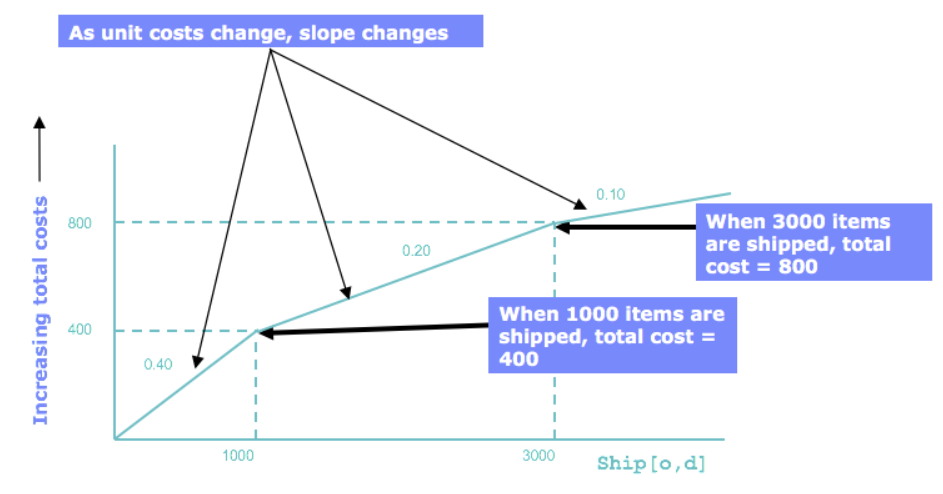

#### Approximating a non-linear convex function with piece-wise linear approximations

Nonlinear convex function can be approximated by a set of linear functions that lend themselves to LP techniques. Piece-wise method is used when solving problems with several linear functions. Examples of problems where piece-wise approximation could be useful is problems involving economies of scale(where unit cost vary based on number of units ordered).

#### An example of piecewise linear programming: economies of scale

Consider a transportation problem in which the transportation cost between an origin, i , and a destination,  j , depends on the size of the shipment,  shipij :

- The first 1000 items have a shipping cost of $ 0.40 per item
- For the next 2000 items (i.e. items 1001-3000) the cost is $ 0.20 per item
- From item 3001 on, the cost decreases to $ 0.10 per item.
- The cost of each quantity bracket remains intact (that is, the cost per unit changes only for additional units, and remains unchanged for the previous quantity bracket).

Within each bracket there is a linear relationship between cost and quantity, but at each breakpoint the rate of linear variation changes.

If you graph this function, you see that at each breakpoint, the slope of the line changes. The section of the graph between two breakpoints is a linear piece.

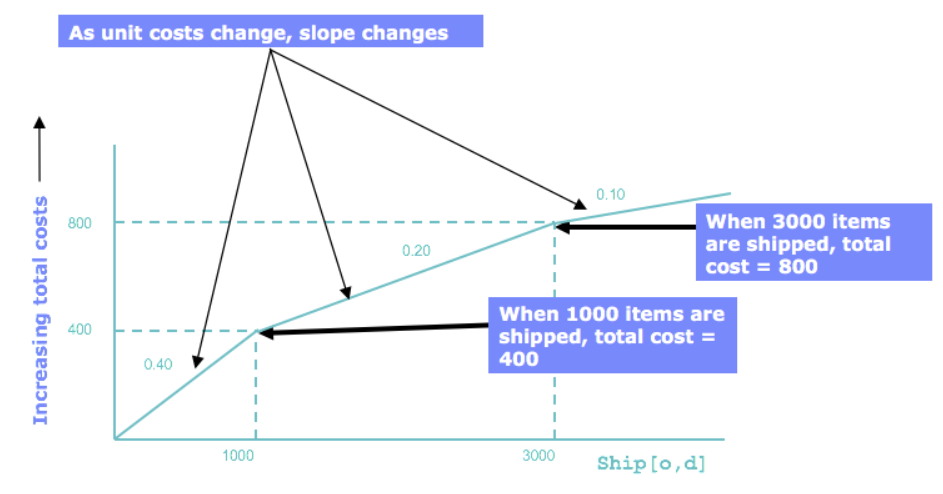

The diagram shows that total shipping cost is evaluated by 3 different linear functions based on total shipments Q:

- 0.4*Q if Q <=1000
- 0.4*1000 + 0.2*(Q-1000) if 1000 < Q <= 3000
- 0.4*1000 + 0.2*2000 + 0.1*Q(Q - 3000) if Q >=3000

This is an example of a piecewise linear function. Note that this function is continuous, that is has no 'jump' in its values, but this not mandatory for piecewise linear functions.

### Piecewise linear functions with DOcplex

DOcplex lets you define piecewise linear functions in two styles: either with a set of points, or with a set of values and slopes. As the problem is formulated with slopes, we'll start with this formulation.

The Model.piecewise_with_slopes method takes a sequence of  ($x_i$,$slope_i$)  values where  $slope_i$  is the slope of the function between  $x_{i−1}$  and  $x_i$ .

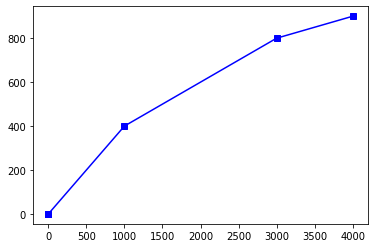

In [8]:
pm = Model(name='pwl')
pwl1= pm.piecewise_as_slopes([(0,0), (0.4, 1000), (0.2, 3000)], lastslope=0.1)
pwl1.plot(lx=-1, rx=4000, color='b', marker='s')

##### Defining a piecewise linear functions from break points
DOcplex also allows to define a piecewise linear function from the set of its break points, that is a sequence of  (xi,yi)  values, plus the final slope towards  +∞ . Here the sequence of breakpoints is:

- (0,0)
- (1000, 400): computed with 0.4 marginal cost
- (3000, 800): computed as 400 + 0.2 * (3000 - 1000)
- final slope is 0.1

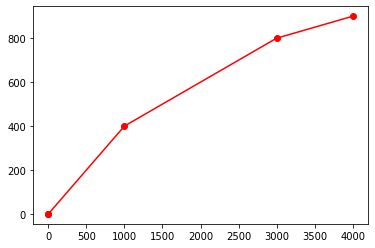

In [9]:
pwl2 = pm.piecewise(preslope=0, breaksxy=[(0,0), (1000, 400), (3000, 800)], postslope=0.1)

# Plot the function

pwl2.plot(lx=-1, rx=4000, marker='o', color='r')

To bind a variable  y  to the result of applying the peicewise linear function to another variable  x , you just have to add the following constraint to the model:

In [10]:
x = pm.continuous_var(name='x')
y = pm.continuous_var(name='y')
pm.add_constraint(y == pwl2(x));  # y is constrained to be equal to f(x)

In [11]:
pwl2(x)

docplex.mp.PwlExpr(pwl, x)

In [12]:
pwl2

docplex.mp.pwl.PwlFunction(preslope=0,breaksxy=[(0, 0), (1000, 400), (3000, 800)],postslope=0.1)

## Integer Optimization

Integer optimization differ from LP problems . It can either be Integer programming or Mixed-integer programming. This kind of problem lends themselves to problems as delineated below:

- Problems where decision variables involve production of indivisible items such as aeroplane, cars and consumer products
- Problems where decision variables are used to model a particular state. E.g ON/ OFF; planning of investments such as building a warehouse or not.

Integer variables can either take integer values 0,1,2,3,4,5 etc or take binary/boolean values(0,1). To ensure integer variables can only take 0 and 1, one can give it an upper bound of 1 or declare it as binary.  In DOCplex model, all decision variables are non-negative by default unless otherwise specified. THe lower bound of 0 does not need to be specified explicitly.

#### Declaring integer decision variables in DOcplex
DOcplex has specific methods to create integer and binary variables.

In [15]:
im = Model(name = 'integer_programming')
b = im.binary_var(name= 'boolean_var')
ijk = im.integer_var(name = 'int_var')
im.print_information()

Model: integer_programming
 - number of variables: 2
   - binary=1, integer=1, continuous=0
 - number of constraints: 0
   - linear=0
 - parameters: defaults
 - objective: none
 - problem type is: MILP


### Modeling techniques with integer and binary variables

#### Indicator variables

These are variables that are used to determine whether a set of conditions is valid or not. For example, consider a production problem where you want to distinguish between two states, namely production above a minimum threshold, and no production.

To model this, define a binary variable  y  to take a value of 1 if the production is above the minimum threshold (called minProd), and 0 if there is no production. Assume  production  is a continuous variable containing the produced quantity. This leads to these two constraints.

$$production \geq minProd∗y$$
$$production \leq maxProd∗y$$

Here, maxProd is an upper bound on the production quantity. Thus, if y = 1, the minimum and maximum production bounds hold, and if y = 0, the production is set to zero.

#### Logical constraints - an example
For example, consider an investment decision involving a production plant and two warehouses.

- If the production plant is invested in, then either warehouse 1 or warehouse 2 may be invested in (not both).
- If the production plant is not invested in, then neither of the two warehouses may be invested in.

Let  yPlant  be 1 if you decide to invest in the production plant, and 0 otherwise. Similar for  yWarehouse1  and  yWarehouse2. Then this example can be modeled as follows:

$$ yWarehouse1+yWarehouse2 \leq yPlant$$ 
 
If  $yPlant$  is 0 then both  $yWarehouse1$  and  $yWarehouse2$  are set to zero.

On the opposite, if one warehouse variable is set to 1, then  yPlant  is also set to 1. Finally, this constraint also states that warehouse variables cannot be both equal to 1.

#### IP versus MIP
When all the decision variables in a linear model should take integer values, the model is an Integer Program (or IP).

When some of the decision variables may also take continuous values, the model is a Mixed Integer Program (or MIP).

MIPs are very common in, for example, some supply chain applications where investment decisions may be represented by integers and production quantities are represented by continuous variables.

IPs and MIPs are generally much more difficult to solve than LPs.

The solution complexity increases with the number of possible combinations of the integer variables, and such problems are often referred to as being “combinatorial”.

In the worst case, the solution complexity increases exponentially with the number of integer decision variables.

Many advanced algorithms can solve complex IPs and MIPs in reasonable time

#### An integer programming example
In the telephone production problem where the optimal solution found in chapter 2 'Linear programming' had integer values, it is possible that the solution becomes non-integer under certain circumstances, for example:

- Change the availability of the assembly machine to 401 hours
- Change the painting machine availability to 492 hours
- Change the profit for a desk phone to 12.4
- Change the profit for a cell phone to 20.2
- The fractional values for profit are quite realistic. Even though the fractional times for availability are not entirely realistic, these are used here to illustrate how fractional solutions may occur.

Let's solve again the telephone production problem with these new data. A detailed explanation of the model is found in notebook themed: __Linear Programming with CPLEX__

In [ ]:
lm = Model(name='lp_telephone_production')
desk = lm.continuous_var(name='desk')
cell = lm.continuous_var(name='cell')
# write constraints
# constraint #1: desk production is greater than 100
lm.add_constraint(desk >= 100)

# constraint #2: cell production is greater than 100
lm.add_constraint(cell >= 100)

# constraint #3: assembly time limit
ct_assembly = lm.add_constraint( 0.2 * desk + 0.4 * cell <= 401)

# constraint #4: paiting time limit
ct_painting = lm.add_constraint( 0.5 * desk + 0.4 * cell <= 492)
lm.maximize(12.4 * desk + 20.2 * cell)

ls = lm.solve(url=url, key=key)
lm.print_solution()

In [16]:
lm = Model(name='lp_telephone_production')
desk = lm.continuous_var(name='desk')
cell = lm.continuous_var(name='cell')

# constraint #1: desk production is greater than 100

lm.add_constraint(desk >= 100)

# constraint #2: cell production is greater than 100

lm.add_constraint(cell >= 100)

# constraint #3: assembly time limit

ct_assembly = lm.add_constraint(0.2 * desk + 0.4 * cell <= 401)

# constraint #3: painting time limit

ct_painting = lm.add_constraint(0.5 * desk + 0.4 * cell <= 492)
lm.maximize(12.4 * desk + 20.2 * cell)

ls = lm.solve()
lm.print_solution()

objective: 20948.167
  desk=303.333
  cell=850.833


As we can see the optimal solution contains fractional values for number of telephones, which are not realistic. To ensure we get integer values in the solution, we can use integer decision variables.

Let's solve a new model, identical except that its two decision variables are declared as integer variables.

In [17]:
lm = Model(name='ip_telephone_production')
desk = lm.integer_var(name='desk')
cell = lm.integer_var(name='cell')

# constraint #1: desk production is greater than 100

lm.add_constraint(desk >= 100)

# constraint #2: cell production is greater than 100

lm.add_constraint(cell >= 100)

# constraint #3: assembly time limit

ct_assembly = lm.add_constraint(0.2 * desk + 0.4 * cell <= 401)

# constraint #3: painting time limit

ct_painting = lm.add_constraint(0.5 * desk + 0.4 * cell <= 492)
lm.maximize(12.4 * desk + 20.2 * cell)

ls = lm.solve()
lm.print_solution()

objective: 20947.400
  desk=303
  cell=851


As expected IP model returns integer values as optimal solution

#### Branch and bound algorithm

The branch and bound method, implemented in CPLEX Mixed-Integer Optimizer, provides an efficient way to solve IP and MIP problems. This method begins by relaxing the integer requirement and treating the problem as an LP. If all the variables take integer values, the solution is complete. If not, the algorithm begins a tree search. You’ll now see an example of this tree search.

The progess of the Branch & Bound algorithm can be monitored by looking at the CPLEX the log. Adding the keyword argument log_output=True to the Model.solve() method will print the log on the standard output. You can see the best bound going down until the gap closes and the final solution of 11 is returned. By default the CPLEX log is not printed.

In [18]:
bbm = Model(name='b&b')
x, y, z = bbm.integer_var_list(3, name=['x', 'y', 'z'])
bbm.maximize(x + y + 2*z)
bbm.add_constraint(7*x + 2*y + 3*z <= 36)
bbm.add_constraint(5*x + 4*y + 7*z <= 42)
bbm.add_constraint(2*x + 3*y + 5*z <= 28)
bbm.solve(log_output=True);

Version identifier: 12.10.0.0 | 2019-11-26 | 843d4de2ae
CPXPARAM_Read_DataCheck                          1
CPXPARAM_RandomSeed                              201903125
Found incumbent of value 0.000000 after 0.00 sec. (0.00 ticks)
Tried aggregator 1 time.
Reduced MIP has 3 rows, 3 columns, and 9 nonzeros.
Reduced MIP has 0 binaries, 3 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.00 ticks)
Tried aggregator 1 time.
Reduced MIP has 3 rows, 3 columns, and 9 nonzeros.
Reduced MIP has 0 binaries, 3 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.00 ticks)
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 8 threads.
Root relaxation solution time = 0.00 sec. (0.00 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap

*     0+    0                            0.0000       24.0000              

In [19]:
bbm.print_solution()

objective: 11
  x=1
  z=5


### Modeling yes/no decisions with binary variables: an example

Binary variables are often used to model yes/no decisions.
Consider again the telephone production problem, but ignore the lower bounds of 100 on production for simplicity. The company is considering replacing the assembly machine with a newer machine that requires less time for cell phones, namely 18 minutes per phone, but more time for desk phones, namely 15 minutes per phone. This machine is available for 430 hours, as opposed to the 400 hours of the existing assembly machine, because it requires less downtime.

We will design and write a model that uses binary variables to help the company choose between the two machines.

The steps to formulate the mixed-integer model are:

- Add four new variables (desk1, desk2, cell1, and cell2, to indicate the production on assembly machines 1 and 2, respectively.
- Add two constraints to define the total production of desk and cell to equal the sum of production from the two assembly machines.
- Rewrite the constraint for assembly machine 1 to use the new variables for that machine (desk1 and cell1).
- Add a similar constraint for the production on assembly machine 2.
- Define a Boolean variable, y, to take a value of 1 if assembly machine 1 is chosen, and 0 if assembly machine 2 is chosen.
Use the y variable to set the production to zero for the machine that is not chosen.


#### Implementing the yes/no decision model with DOcplex

First, create a model instance.

In [20]:
tm2 = Model('decision_phone')

##### Setup decision variables
we create two sets of (desk, cell) integer variables, one per machine type, plus the total production variables. Note that the total production variables do not need to be declared if the four typed productions are integers. As the sum of two integers, they will always be integers; the less we have of integer variables, the easier CPLEX willsolve the problem.

In addition, we define an extra binary variable  z  to model the choice we are facing: use machine #1 or machine #2.

#### Setup decision variables

In [21]:
# Variables for total production
desk = tm2.integer_var(name='desk', lb=100)
cell = tm2.integer_var(name='cell', lb=100)

# Two variables per machine type:
desk1 = tm2.integer_var(name='desk1')
cell1 = tm2.integer_var(name='cell1')

desk2 = tm2.integer_var(name='desk2')
cell2 = tm2.integer_var(name='cell2')

# Defining yes/no variable
z = tm2.binary_var(name='z')

#### Setup constraints
- The constraint for painting machine limit is identical to the basic telephone model
- Two extra constraints express the total production as the sum of productions on the two assembly machines.
- Each assembly machine type has its own constraint, in which variable  z  expresses the exclusive choice between the two. z = 1 if #type1 is chosen and z = 0 if #type2 is chosen

In [22]:
# Constraint on total production
tm2.add_constraint(desk1 + desk2 == desk)
tm2.add_constraint(cell1 + cell2 == cell)

# Production on assembly machine of type1 must be less than 400, if y is 1, for choosing type1
tm2.add_constraint(0.2 * desk1 + 0.4 * cell1 <= 400 * z)

# Production on assembly machine of type2 must be less than 430, if y is 0, for choosing type2
tm2.add_constraint(0.25 * desk2 + 0.3 * cell2 <= 430 * (1-z))

# painting machine limit is identical
# constraint #4: paiting time limit
tm2.add_constraint( 0.5 * desk + 0.4 * cell <= 490)

tm2.print_information()

Model: decision_phone
 - number of variables: 7
   - binary=1, integer=6, continuous=0
 - number of constraints: 5
   - linear=5
 - parameters: defaults
 - objective: none
 - problem type is: MILP


##### Expressing the objective

The objective is identical: maximize total profit, using total productions.

In [23]:
tm2.maximize(12 * desk + 20 * cell)

In [24]:
tm2s= tm2.solve(log_output=True)
assert tm2s
tm2.print_solution()

Version identifier: 12.10.0.0 | 2019-11-26 | 843d4de2ae
CPXPARAM_Read_DataCheck                          1
CPXPARAM_RandomSeed                              201903125
Found incumbent of value 12800.000000 after 0.00 sec. (0.00 ticks)
Tried aggregator 1 time.
MIP Presolve modified 3 coefficients.
Reduced MIP has 5 rows, 7 columns, and 14 nonzeros.
Reduced MIP has 1 binaries, 6 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.01 ticks)
Probing fixed 0 vars, tightened 1 bounds.
Probing time = 0.00 sec. (0.00 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 5 rows, 7 columns, and 14 nonzeros.
Reduced MIP has 1 binaries, 6 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.01 ticks)
Probing time = 0.00 sec. (0.00 ticks)
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 8 threads.
Root relaxation solution time = 0.00 sec. (0.01 ticks)

        Nodes                

The model demonstrates that optimal solution is to use #type2 machine producing 100 desks and 1100 cellphones

## Quadratic programming

Quadratic programs(QP) have quadratic objectives and linear constraints. A model that has quadratic functions in the constraints is called quadratically constrained programs(QCP). The objective function of a QCP maybe quadratic/linear.

A simple formulation of a QP is:

$$minimize   $$ $$\frac{1}{2}x^tQx + c^tx$$
$$subject to$$
$$Ax \leq b$$
$$lb \leq x \leq ub$$

The first objective term is quadratic, with Q being the matrix of objective function coefficients of the quadratic terms. The second term and the constraints are linear. CPLEX Optimizer can solve convex QP and QCP problems. Quadratic programming is used in several real-world situations, for example portfolio management or chemical process modeling. In the next two slides, you’ll see how QP applies to portfolio management.

A model that has quadratic functions in the constraints is a Quadratically Constrained Program (QCP). The objective function of a QCP problem may be quadratic or linear.

The first objective term is quadratic, with Q being the matrix of objective function coefficients of the quadratic terms. The second term and the constraints are linear. CPLEX Optimizer can solve convex QP and QCP problems. Quadratic programming is used in several real-world situations, for example portfolio management or chemical process modeling. In the next two slides, you’ll see how QP applies to portfolio management.

A model that has quadratic functions in the constraints is a Quadratically Constrained Program (QCP). The objective function of a QCP problem may be quadratic or linear.

## Portfolio management

In order to mitigate risk while ensuring a reasonable level of return, investors purchase a variety of securities and combine these into an investment portfolio. Each security has an expected return and an associated level of risk (or variance).

Securities sometimes covary, that is, they change together with some classes of securities, and in the opposite direction of other classes of securities. An example of positive covariance is when shares in technology companies follow similar patterns of increases and decreases in value. On the other hand, as the price of oil rises, shares in oil companies may increase in value, but plastics manufacturers, who depend on petroleum as a major primary resource, may see their shares decline in value as their costs go up and vice versa. This is negative covariance.

To optimize a portfolio in terms of risk and return, an investor will evaluate the sum of expected returns of the securities, the total variances of the securities, and the covariances of the securities. A portfolio that contains a large number of positively covariant securities is more risky (and potentially more rewarding) than one that contains a mix of positively and negatively covariant securities.

#### Portfolio optimization: In action!

Portfolio optimization is used to select securities to maximize the rate of return, while managing the volatility of the portfolio and remaining within the investment budget.

As the securities covary with one another, selecting the right mix of securities can change or even reduce the volatility of the portfolio with the same expected return.

At a given expected rate of return, there is one portfolio which has the lowest risk. If you plot each lowest-risk portfolio for each expected rate of return, the result is a convex graph, called the efficient frontier.

The risk-return characteristics of a portfolio change in a nonlinear fashion, and quadratic expressions are used to model them.

Data comes in two parts:

- Basic data on shares: activity sector, expected return rate, and whether or not activity is based in North America
- The covariance square matrix for all pairs of shares.

The pandas Python data analysis library is used to store the data. Let's set up and declare the data.

In [26]:
import pandas as pd

In [32]:
sec_data = {
    'sector': ['treasury', 'hardware', 'theater', 'telecom', 'brewery', 'highways', 'cars', 'bank', 'software',
               'electronics'],
    'return': [5, 17, 26, 12, 8, 9, 7, 6, 31, 21],
    'area': ['N-Am.', 'N-Am.', 'N-Am.', 'N-Am.', "ww", 'ww', 'ww', 'ww', 'ww', 'ww']
}

df_secs = pd.DataFrame(sec_data)
df_secs.set_index('sector', inplace=True)

# store set of share names
securities = df_secs.index

In [33]:
df_secs

,return,area
sector,,
treasury,5,N-Am.
hardware,17,N-Am.
theater,26,N-Am.
telecom,12,N-Am.
brewery,8,ww
highways,9,ww
cars,7,ww
bank,6,ww
software,31,ww


In [34]:
securities

Index(['treasury', 'hardware', 'theater', 'telecom', 'brewery', 'highways',
       'cars', 'bank', 'software', 'electronics'],
      dtype='object', name='sector')

#### The covariance matrix
Covariance matrix is a square matrix (its size is the number of shares). The covariance matrix is also stored in a pandas DataFrame.

In [43]:
# the variance matrix
var = {
    "treasury": [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "hardware": [0, 19, -2, 4, 1, 1, 1, 0.5, 10, 5],
    "theater": [0, -2, 28, 1, 2, 1, 1, 0, -2, -1],
    "telecom": [0, 4, 1, 22, 0, 1, 2, 0, 3, 4],
    "brewery": [0, 1, 2, 0, 4, -1.5, -2, -1, 1, 1],
    "highways": [0, 1, 1, 1, -1.5, 3.5, 2, 0.5, 1, 1.5],
    "cars": [0, 1, 1, 2, -2, 2, 5, 0.5, 1, 2.5],
    "bank": [0, 0.5, 0, 0, -1, 0.5, 0.5, 1, 0.5, 0.5],
    "software": [0, 10, -2, 3, 1, 1, 1, 0.5, 25, 8],
    "electronics": [0, 5, -1, 4, 1, 1.5, 2.5, 0.5, 8, 16]
}

dfv = pd.DataFrame(var, index=securities)#, columns=securities)
dfv

,treasury,hardware,theater,telecom,brewery,highways,cars,bank,software,electronics
sector,,,,,,,,,,
treasury,0.1,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
hardware,0.0,19.0,-2,4,1.0,1.0,1.0,0.5,10.0,5.0
theater,0.0,-2.0,28,1,2.0,1.0,1.0,0.0,-2.0,-1.0
telecom,0.0,4.0,1,22,0.0,1.0,2.0,0.0,3.0,4.0
brewery,0.0,1.0,2,0,4.0,-1.5,-2.0,-1.0,1.0,1.0
highways,0.0,1.0,1,1,-1.5,3.5,2.0,0.5,1.0,1.5
cars,0.0,1.0,1,2,-2.0,2.0,5.0,0.5,1.0,2.5
bank,0.0,0.5,0,0,-1.0,0.5,0.5,1.0,0.5,0.5
software,0.0,10.0,-2,3,1.0,1.0,1.0,0.5,25.0,8.0


There is a constraint that the total fraction of wealth invested in North American securities must be greater than some minimum value. To implement this constraint, we add a new column to df_secs, that is equal to 1 if and only if the area column equals "N.-Am.", else is equal to 0 (see later how we use this column to implement the constraint).

In [48]:
def is_nam(Series):
    return 1 if Series == 'N-Am.' else 0

In [49]:
df_secs['is_na'] = df_secs['area'].apply(is_nam)

In [50]:
df_secs

,return,area,is_na
sector,,,
treasury,5,N-Am.,1
hardware,17,N-Am.,1
theater,26,N-Am.,1
telecom,12,N-Am.,1
brewery,8,ww,0
highways,9,ww,0
cars,7,ww,0
bank,6,ww,0
software,31,ww,0


In [58]:
from docplex.mp.advmodel import AdvModel as Model

mdl = Model(name='portfolio_miqp')

We model variables as the fraction of wealth to invest in each share. Each variable is a continuous variable between 0 and 1. Variables are stored in a column of the dataframe.

In [59]:
# create variables
df_secs['frac'] = mdl.continuous_var_list(securities, name='frac', ub=1)

#### Express the business constraints
The business constraints are the following:

- the sum of allocated fractions equal 100%
- each security cannot exceed a certain percentage of the initial allocated wealth (here 30%)
- there must be at least 40% of wealth invested in securities hosted in North America
- compound return on investment must be less than or equal to a minimum target (say 9%)

In [ ]:
# max fraction
frac_max = 0.3
for row in df_secs.itertuples():
    mdl.add_constraint(row.frac <= 0.3)
    
# sum of fractions equal 100%
mdl.add_constraint(mdl.sum(df_secs.frac) == 1);

# north america constraint:
#    - add a 1-0 column equal to 1 
# compute the scalar product of frac variables and the 1-0 'is_na' column and set a minimum
mdl.add_constraint(mdl.dot(df_secs.frac, df_secs.is_na) >= .4);

# ensure minimal return on investment
target_return = 9 # return data is expressed in percents
# again we use scalar product to compute compound return rate
# keep the expression to use as a kpi.
actual_return = mdl.dot(df_secs.frac, df_secs['return'])
mdl.add_kpi(actual_return, 'ROI')

# keep the constraint for later use (more on this later)
ct_return = mdl.add_constraint(actual_return >= 9);

In [76]:
# max fraction

frac_max = 0.3
for row in df_secs.itertuples():
    mdl.add_constraint(row.frac <= frac_max);
    
# sum of fractions equal 100%

mdl.add_constraint(mdl.sum(df_secs.frac) == 1);

# north america constraint:
#    - add a 1-0 column equal to 1 
# compute the scalar product of frac variables and the 1-0 'is_na' column and set a minimum

mdl.add_constraint(mdl.dot(df_secs.frac, df_secs.is_na) >= .4);

# ensure minimal return on investment
target_return = 9 # return data is expressed in percents
# Keep the expression to keep as KPI

actual_return = mdl.dot(df_secs.frac, df_secs['return'])
mdl.add_kpi(actual_return, 'ROI')

# keep the constraint for later use (more on this later)
ct_return = mdl.add_constraint(actual_return >= 9);

#### Express the objective
The objective or goal is to minimize risk, here computed as the variance of the allocation, given a minimum return rate is guaranteed. Variance is computed as a quadratic expression, which makes this model a Quadratic Programming (QP) model

In [82]:
# KPIs
fracs = df_secs.frac
variance = mdl.sum(float(dfv[sec1][sec2]) * fracs[sec1] * fracs[sec2] for sec1 in securities for sec2 in securities)
mdl.add_kpi(variance, 'Variance')

# finally the objective
mdl.minimize(variance)

In [83]:
variance

docplex.mp.quad.QuadExpr(0.100frac_treasury^2+19frac_hardware^2-4frac_hardware*frac_theater+8frac_hardware*frac_telecom+2frac_hardware*frac_brewery+2frac_hardware*frac_highways+2frac_hardware*frac_cars+frac_hardware*frac_bank+20frac_hardware*frac_software+10frac_hardware*frac_electronics+28frac_theater^2+2frac_theater*frac_telecom+4frac_theater*frac_brewery+2frac_theater*frac_highways+2frac_theater*frac_cars-4frac_theater*frac_software-2frac_theater*frac_electronics+22frac_telecom^2+2frac_telecom*frac_highways+4frac_telecom*frac_cars+6frac_telecom*frac_software+8frac_telecom*frac_electronics+4frac_brewery^2-3frac_brewery*frac_highways-4frac_brewery*frac_cars-2frac_brewery*frac_bank+2frac_brewery*frac_software+2frac_brewery*frac_electronics+3.500frac_highways^2+4frac_highways*frac_cars+frac_highways*frac_bank+2frac_highways*frac_software+3frac_highways*frac_electronics+5frac_cars^2+frac_cars*frac_bank+2frac_cars*frac_software+5frac_cars*frac_electronics+frac_bank^2+frac_bank*frac_softwa

##### Solve with the Decision Optimization solve service

In [84]:
mdl.solve()
mdl.report()

* model portfolio_miqp solved with objective = 0.406
*  KPI: ROI      = 9.000
*  KPI: Variance = 0.406


In [85]:
mdl.print_information()

Model: portfolio_miqp
 - number of variables: 10
   - binary=0, integer=0, continuous=10
 - number of constraints: 35
   - linear=35
 - parameters: defaults
 - objective: minimize quadratic
 - problem type is: QP


In [86]:
mdl.print_solution()

objective: 0.406
  frac_treasury=0.300
  frac_hardware=0.021
  frac_theater=0.055
  frac_telecom=0.025
  frac_brewery=0.153
  frac_highways=0.086
  frac_cars=0.016
  frac_bank=0.290
  frac_software=0.043
  frac_electronics=0.011


The model has solved with a target return of 9% and a variance of 0.406.

In [97]:
all_fracs = {}
for row in df_secs.itertuples():
    pct = 100 * row.frac.solution_value
    all_fracs[row[0]] = pct
    print('-- fraction allocated in: {0:<12} ===> {1:.2f}%'.format(row[0], pct))

-- fraction allocated in: treasury     ===> 30.00%
-- fraction allocated in: hardware     ===> 2.08%
-- fraction allocated in: theater      ===> 5.46%
-- fraction allocated in: telecom      ===> 2.46%
-- fraction allocated in: brewery      ===> 15.35%
-- fraction allocated in: highways     ===> 8.60%
-- fraction allocated in: cars         ===> 1.61%
-- fraction allocated in: bank         ===> 29.00%
-- fraction allocated in: software     ===> 4.34%
-- fraction allocated in: electronics  ===> 1.10%


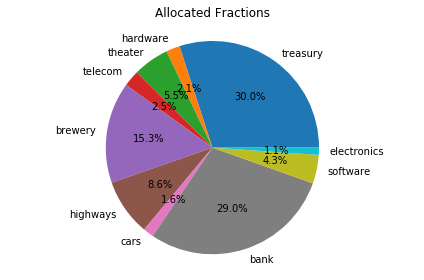

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt

def display_pie(pie_values, pie_labels, colors=None,title=''):
    plt.axis("equal")
    plt.pie(pie_values, labels=pie_labels, colors=colors, autopct="%1.1f%%")
    plt.title(title)
    plt.tight_layout()
                                                           
display_pie( all_fracs.values(), all_fracs.keys(),title='Allocated Fractions')

#### What-if analysis: trying different values for target return
The above model was solved with a 'hard coded' value of 9% for the target. Now, one can wonder how variance would vary if we changed this target return value.

In this part, we will leverage DOcplex model edition capabilities to explore different scenarios with different target return values. We will run the model for target return values betwen 4% and 20%. For each possible target return value, we modify the right-hand side (or rhs) of the ct_target constraint we kept as a variable, and solve again, keeping the values in a list.

In [100]:
target_returns = range(5,21)  # from 5 to 20, included
variances = []
for target in target_returns:
    # modify the constraint's right hand side.
    ct_return.rhs = target
    cur_s = mdl.solve()
    assert cur_s  # solve is OK
    cur_variance = variance.solution_value
    print('- for a target return of: {0}%, variance={1}'.format(target, cur_variance))
    variances.append(cur_variance)

- for a target return of: 5%, variance=0.28105252209449944
- for a target return of: 6%, variance=0.28105252214416476
- for a target return of: 7%, variance=0.28105252225011274
- for a target return of: 8%, variance=0.30818590869638357
- for a target return of: 9%, variance=0.40557734940356227
- for a target return of: 10%, variance=0.5503435250054378
- for a target return of: 11%, variance=0.7417945731282698
- for a target return of: 12%, variance=0.9798459646928664
- for a target return of: 13%, variance=1.2598935443762442
- for a target return of: 14%, variance=1.5813755540443808
- for a target return of: 15%, variance=1.9442235946080064
- for a target return of: 16%, variance=2.3469592331334908
- for a target return of: 17%, variance=2.7889850545628727
- for a target return of: 18%, variance=3.2707284094234224
- for a target return of: 19%, variance=3.792503995389222
- for a target return of: 20%, variance=4.3543118101284675


Again we use matplotlib to plot the target returns and variances

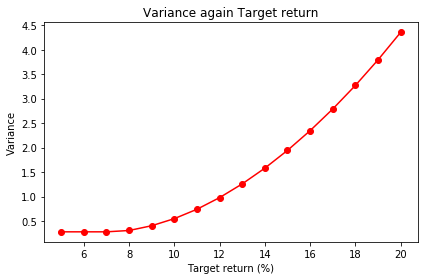

In [101]:
plt.plot(target_returns, variances, 'ro-')
plt.title('Variance again Target return')
plt.xlabel('Target return (%)')
plt.ylabel('Variance')
plt.tight_layout()

Variance increases with target return

__Source__ : https://rawgit.com/IBMDecisionOptimization/docplex-doc/master/docs/mp_vs_cp.html